# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.75, 0.95]
NESTEROV = [True, False]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for mmt in MOMENTUM:
        for nr in NESTEROV:
            keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=nr, momentum=mmt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr) + "-mmt-%s" % str(mmt) + "-nr-%s" % str(nr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0717 17:18:58.872135 4716164544 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 17:18:58.873205 4716164544 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 17:18:58.886159 4716164544 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 17:18:58.888101 4716164544 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.9

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8949 - acc: 0.3152 - val_loss: 1.7781 - val_acc: 0.3595
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6780 - acc: 0.3976 - val_loss: 1.6266 - val_acc: 0.4247
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5908 - acc: 0.4328 - val_loss: 1.5332 - val_acc: 0.4583
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5286 - acc: 0.4536 - val_loss: 1.5221 - val_acc: 0.4568
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4862 - acc: 0.4685 - val_loss: 1.4837 - val_acc: 0.4644
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4454 - acc: 0.4816 - val_loss: 1.4780 - val_acc: 0.4781
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4280 - acc: 0.4887 - val_loss: 1.4453 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 2.0080 - acc: 0.2949 - val_loss: 1.9581 - val_acc: 0.3152
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.9251 - acc: 0.3289 - val_loss: 1.8957 - val_acc: 0.3360
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.8731 - acc: 0.3459 - val_loss: 1.8550 - val_acc: 0.3455
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8371 - acc: 0.3586 - val_loss: 1.8226 - val_acc: 0.3621
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8091 - acc: 0.3679 - val_loss: 1.7967 - val_acc: 0.3659
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7851 - acc: 0.3779 - val_loss: 1.7736 - val_acc: 0.3829
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7646 - acc: 0.3849 - val_loss: 1.7562 - val_acc: 0.3900
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 53us/step - loss: 1.7455 - acc: 0.3887 - val_loss: 1.7173 - val_acc: 0.3920
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6946 - acc: 0.4024 - val_loss: 1.6629 - val_acc: 0.4165
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6431 - acc: 0.4225 - val_loss: 1.6309 - val_acc: 0.4248
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6028 - acc: 0.4386 - val_loss: 1.5897 - val_acc: 0.4457
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5771 - acc: 0.4467 - val_loss: 1.5745 - val_acc: 0.4499
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5466 - acc: 0.4555 - val_loss: 1.5476 - val_acc: 0.4600
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5156 - acc: 0.4676 - val_loss: 1.5381 - val_acc: 0.4522
Epoch 10/50
50000/50000 [===========================

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

'\n將實驗結果繪出\n'

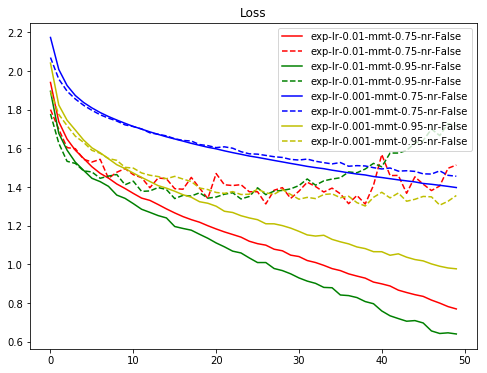

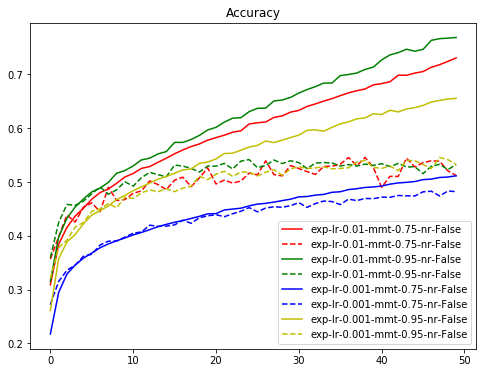

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()